In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,40]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 40}
2,logistic_regression,0.966667,{'C': 5}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

Text(66.5, 0.5, 'Truth')

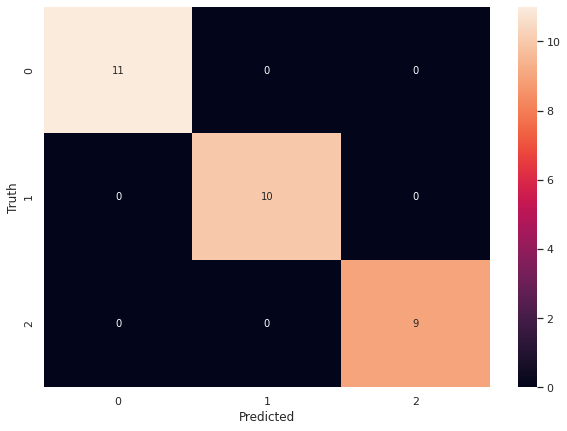

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt




In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.3)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
import numpy as np
np.average(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=3))

0.9533333333333333

In [ ]:
np.average(cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=3))

0.9733333333333333



```
# This is formatted as code
```

from sklearn.tree import DecisionTreeClassifier
cross_val_score(DecisionTreeClassifier(), iris.data, iris.target,cv=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
np.average(cross_val_score(DecisionTreeClassifier(random_state=42), iris.data, iris.target,cv=3))

0.96

In [ ]:
np.average(cross_val_score(RandomForestClassifier(n_estimators=50),iris.data, iris.target,cv=3))

0.9666666666666667

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')



In [ ]:
import imblearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
df = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
df.drop('ID', axis = 1, inplace = True)

#df.dropna(inplace = True)
df.shape

(80000, 9)

In [ ]:
print(df.isnull().sum())
print(df.Crop_status.value_counts())

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64
0    66716
1    11183
2     2101
Name: Crop_status, dtype: int64


In [ ]:
#@title
#Upsampling minority class
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
 
df_majority = df[df['Crop_status'] == 1]
df_minority2 = df[df['Crop_status'] == 2]
df.drop(df[df['Crop_status'] == 2].index, inplace = True)
df.drop(df[df['Crop_status'] == 1].index, inplace = True)

# Upsample minority class

df_minority_upsampled_2 = resample(df_minority2,
                             replace=True,  # sample with replacement
                             n_samples=5000, random_state = 42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df, df_majority, df_minority_upsampled_2])
df = df_upsampled.copy()
# Display new class counts
#print(df_upsampled.FRAUD.value_counts())


In [ ]:

feature_cols = ['Insects', 'Crop', 'Soil', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not used', 'Season']
X = df[feature_cols]
y = df.Crop_status

#training_data=pd.get_dummies(X, columns=["Crop","Soil", "Category_of_Toxicant", "Season"])
training_data=pd.get_dummies(X, columns=["Crop","Soil", "Season"])
training_data.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

#training_data.fillna(-1, inplace = True)

#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), inplace = True)

print(training_data.isnull().sum())

training_data.drop('Soil_clay', axis = 1, inplace = True)
training_data.drop('Crop_Feed', axis = 1, inplace = True)
training_data.drop('Season_3', axis = 1, inplace = True)
#training_data.drop('Category_of_Toxicant_3', axis = 1, inplace = True)
#training_data.drop('Season_3', axis = 1, inplace = True)




Insects                          0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not_used       0
Crop_Feed                        0
Crop_Food                        0
Soil_clay                        0
Soil_silt                        0
Season_1                         0
Season_2                         0
Season_3                         0
dtype: int64


In [ ]:
training_data.head(5)

,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not_used,Crop_Food,Soil_silt,Season_1,Season_2
0,188,1,0,0.0,0,0,0,1,0
1,209,1,0,0.0,0,0,0,0,1
2,257,1,0,0.0,0,0,0,0,1
3,257,1,0,0.0,0,0,1,0,1
4,342,1,0,0.0,0,0,0,0,1


In [ ]:
#@title
#Scaling features

from sklearn.preprocessing import StandardScaler

col_names = ['Insects', 'Does_count', 'Number_of_Weeks_Used',
       'Number_Weeks_does_not_used']

scaled_features = training_data.copy()

features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
#StandardScaler().fit_transform(training_data.drop(, axis = 1))

scaled_features.head()

training_data = scaled_features.copy()
training_data.head()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

# fit model no training data


test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

test_df_off.drop('ID', axis = 1, inplace = True)
test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

#test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil", "Category_of_Toxicant", "Season"])
test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil", "Season"])
test_df_off.drop('Soil_clay', axis = 1, inplace = True)
test_df_off.drop('Crop_Feed', axis = 1, inplace = True)
#test_df_off.drop('Category_of_Toxicant_3', axis = 1, inplace = True)
test_df_off.drop('Season_3', axis = 1, inplace = True)
test_df_off.head()


,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not_used,Crop_Food,Soil_silt,Season_1,Season_2
0,188,1,0,NaN,0,0,1,0,1
1,410,1,0,0.0,0,0,1,0,1
2,626,1,0,0.0,0,0,0,0,1
3,731,1,0,0.0,0,0,0,0,1
4,789,1,0,0.0,0,1,0,1,0


In [ ]:
print(training_data.shape)
print(y.shape)
print(test_df_off.shape)

(80000, 9)
(80000,)
(35000, 9)


In [ ]:
corrmat_train = df.corr()
top_corr_features = corrmat_train.index
plt.figure(figsize=(20,20))

g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")
print(training_data.head())
print(test_df_off.head())


In [ ]:
param_grid = {
              "learning_rate"   : list(np.arange(0.01,0.2,0.01))
              # "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
              # "min_child_weight": [1, 3, 5, 7],
              # "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4, 0.8],
              # "colsample_bytree": [0.3, 0.4, 0.5, 0.7, 1],
              #"n_estimators" : list(range(1400,1600,10))
              }

model = XGBClassifier(n_estimators = 1500)
#model = XGBClassifier(n_estimators = 100, learning_rate = 0.15, max_depth = 12, min_child_weight = 3, gamma = )

#grd_xbg = GridSearchCV(model, param_grid, scoring="accuracy", cv=5)
grd_xbg = GridSearchCV(model, param_grid, scoring="accuracy", cv=5, verbose = 10, n_jobs = -1)
grd_xbg.fit(training_data, y)

#print(np.average(cross_val_score(model,training_data, y,cv=5)))

print(grd_xbg.best_score_)
print(grd_xbg.best_params_)

print(grd_xbg.best_estimator_)


In [ ]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
print(np.average(cross_val_score(model,training_data, y,cv=5)))

#model.fit(training_data, y)

#pred = pd.DataFrame(model.predict(test_df_off))

0.84435


In [ ]:
def dtrain_weights(y, wt_0 = 0.031, wt_1 = 0.187, wt_2 = 1):
  weight = []
  for ind in y.index:
    if y[ind] == 0:
      weight.append(wt_0)
    elif y[ind] == 1:
      weight.append(wt_1)
    else:
      weight.append(wt_2)
  
  return weight

In [ ]:
#split of training data to get a good estimate of where I am going wrong
from google.colab import files
import xgboost as xgb
from sklearn.metrics import accuracy_score, make_scorer

alg = XGBClassifier(n_estimators=1300, objective='multi:softmax', num_class = 3, nthread=4, seed=27, verbosity = 1, 
                    learning_rate=0.05, eval_metric = "mlogloss", subsample = 0.6)

print("Start Feeding Data")
xgb_param = alg.get_xgb_params()

#d_train = xgb.DMatrix(training_data, label=y, weight = dtrain_weights(y_train, 1,1,1), missing = np.nan)
#model = XGBClassifier(n_estimators=1500) # 86.42 accuracy with 1500 estimators, Benchmar
model = xgb.DMatrix(training_data, label=y, missing = np.nan)

cvresult = xgb.cv(xgb_param, model, num_boost_round=alg.get_params()['n_estimators'],
                  early_stopping_rounds=50, stratified = True, nfold = 3, shuffle = True, verbose_eval = True, metrics = [ "mlogloss"])
alg.set_params(n_estimators=cvresult.shape[0])
print(alg)

alg.fit(training_data, y)

predictions = alg.predict(test_df_off)
pd.DataFrame(cvresult)

Start Feeding Data
[0]	train-mlogloss:1.05304+4.89149e-05	test-mlogloss:1.05312+3.04448e-05
[1]	train-mlogloss:1.01147+0.000111144	test-mlogloss:1.01157+0.000123996
[2]	train-mlogloss:0.973135+0.000281598	test-mlogloss:0.973256+0.000172558
[3]	train-mlogloss:0.937916+0.000360309	test-mlogloss:0.938053+0.00021046
[4]	train-mlogloss:0.905443+0.000386761	test-mlogloss:0.905614+0.000289608
[5]	train-mlogloss:0.875384+0.000395334	test-mlogloss:0.875566+0.000239478
[6]	train-mlogloss:0.84764+0.000470033	test-mlogloss:0.847839+0.000247933
[7]	train-mlogloss:0.82188+0.000484186	test-mlogloss:0.822121+0.000331247
[8]	train-mlogloss:0.797954+0.000504442	test-mlogloss:0.798249+0.000345822
[9]	train-mlogloss:0.775659+0.000615322	test-mlogloss:0.775979+0.000314507
[10]	train-mlogloss:0.754792+0.000771415	test-mlogloss:0.755145+0.000347853
[11]	train-mlogloss:0.735338+0.000882038	test-mlogloss:0.735724+0.000386643
[12]	train-mlogloss:0.717326+0.000930502	test-mlogloss:0.717759+0.000337175
[13]	train

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,1.053040,0.000049,1.053121,0.000030
1,1.011470,0.000111,1.011566,0.000124
2,0.973135,0.000282,0.973256,0.000173
3,0.937916,0.000360,0.938053,0.000210
4,0.905443,0.000387,0.905614,0.000290
...,...,...,...,...
728,0.408420,0.001660,0.422991,0.003632
729,0.408405,0.001664,0.422988,0.003635
730,0.408391,0.001664,0.422990,0.003641
731,0.408374,0.001665,0.422981,0.003642


In [ ]:
pred.to_csv('predictions.csv') 
files.download('1500_season_dummied.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
k_t = XGBClassifier()
print(k_t)
print(np.average(cross_val_score(model,training_data, y,cv=5)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8448125


In [ ]:
#----------------SMOTE--------------------

In [ ]:
#@title

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE() 

X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#@title
from collections import Counter

print("Before smote ", Counter(y_train))
print("Before smote ", Counter(y_train_smote))

Before smote  Counter({0: 53350, 1: 8957, 2: 1693})
Before smote  Counter({0: 53350, 1: 53350, 2: 53350})


In [ ]:
#@title
X_train_smote = pd.DataFrame(X_train_smote, columns= ['Insects', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not_used', 'Season', 'Crop_Food', 'Soil_silt'])
y_train_smote = pd.DataFrame(y_train_smote, columns= ['Crop_status'])

In [ ]:
#SMOTE END

In [ ]:
training_data.fillna(-999, inplace = True)
training_data.isnull().sum()

Insects                       0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not_used    0
Season                        0
Crop_Food                     0
Soil_silt                     0
dtype: int64

In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.3, random_state = 42, stratify = y)
params_1 = {
    'objective': "multi:softmax",
    'num_class': 3,
    'eta': 0.1,
    'max_depth': 6,
    'eval_metric': "mlogloss"
}


num_boost_round = 2000
#, weight = [1.0, 0.187, 0.031]
k = []

d_train = xgb.DMatrix(X_train, label=y_train, weight = dtrain_weights(y_train, 1,1,1), missing = np.nan)
d_test = xgb.DMatrix(X_test, label=y_test, weight = dtrain_weights(y_test, 1,1,1), missing = np.nan)
eval_set = [(d_test, "Test")]

for i in range(1,3):  
  xgb_clf = xgb.train(params_1, d_train, num_boost_round=num_boost_round, evals=eval_set, early_stopping_rounds=100, verbose_eval=True)
  k.append(xgb_clf.best_ntree_limit)
  pred_train = xgb_clf.predict(d_train, output_margin=True)

  d_train.set_base_margin(pred_train)
  
  
pred = xgb_clf.predict(d_test)
y_train_pred = xgb_clf.predict(xgb.DMatrix(X_train))

print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
#print("F1 score: ", f1_score(d_test, pred, average='micro'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))

[0]	Test-mlogloss:1.00674
Will train until Test-mlogloss hasn't improved in 100 rounds.
[1]	Test-mlogloss:0.930275
[2]	Test-mlogloss:0.865744
[3]	Test-mlogloss:0.8107
[4]	Test-mlogloss:0.76357
[5]	Test-mlogloss:0.722939
[6]	Test-mlogloss:0.687634
[7]	Test-mlogloss:0.656835
[8]	Test-mlogloss:0.63004
[9]	Test-mlogloss:0.606583
[10]	Test-mlogloss:0.585916
[11]	Test-mlogloss:0.567798
[12]	Test-mlogloss:0.55185
[13]	Test-mlogloss:0.537902
[14]	Test-mlogloss:0.525464
[15]	Test-mlogloss:0.514587
[16]	Test-mlogloss:0.504993
[17]	Test-mlogloss:0.496476
[18]	Test-mlogloss:0.488956
[19]	Test-mlogloss:0.482237
[20]	Test-mlogloss:0.476367
[21]	Test-mlogloss:0.471152
[22]	Test-mlogloss:0.466543
[23]	Test-mlogloss:0.462418
[24]	Test-mlogloss:0.458726
[25]	Test-mlogloss:0.455445
[26]	Test-mlogloss:0.452493
[27]	Test-mlogloss:0.44989
[28]	Test-mlogloss:0.447592
[29]	Test-mlogloss:0.44542
[30]	Test-mlogloss:0.443499
[31]	Test-mlogloss:0.441725
[32]	Test-mlogloss:0.440151
[33]	Test-mlogloss:0.438653
[34]

In [ ]:
np.unique(compute_sample_weight("balanced",y_train))

array([ 0.39987504,  2.38174984, 12.60090569])

In [ ]:
#comprehensive code for xgboost
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42, stratify = y)

# param_grid = {
#               #"learning_rate"   : 0.1,
#               #"max_depth"       : 3,
#               # "min_child_weight": 1,
#               # "gamma"           : 0,
#               # "colsample_bytree": 1,
#               "n_estimators" : 718,
#               "objective": 'multi:softmax', 
#               "num_class": 3,
#               #"scale_pos_weight": 1,
#               "nthread": -1,
#               "seed" :  27
#               #"subsample" : 1
#               }


alg = XGBClassifier(n_estimators=1500, objective='multi:softmax', num_class = 3, nthread=4, seed=27, verbosity = 1, learning_rate=0.1, colsample_bytree=0.6)

print("Start Feeding Data")
xgb_param = alg.get_xgb_params()
#xgtrain = xgb.DMatrix(X_train.values, label=y_train.values, weight = compute_sample_weight("balanced",y_train))     #compute_sample_weight("balanced",y_train))  #0.031,0.5,1
#xgtest = xgb.DMatrix(X_test.values, label=y_test.values, weight = compute_sample_weight("balanced",y_test))

xgtrain = xgb.DMatrix(X_train.values, label=y_train.values, missing = np.nan)     #compute_sample_weight("balanced",y_train))  #0.031,0.5,1
xgtest = xgb.DMatrix(X_test.values, label=y_test.values, missing = np.nan)


cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,
                  early_stopping_rounds=50)
alg.set_params(n_estimators=cvresult.shape[0])

print(cvresult)

alg.fit(X_train, y_train, eval_metric='auc')

predictions = alg.predict(X_test)

y_train_pred = alg.predict(X_train)

print("Training_acc", accuracy_score(y_train, y_train_pred))

print("Testing Accuracy ", accuracy_score(y_test, predictions))
print("F1 score ", f1_score(y_test, predictions, average = 'weighted'))
print(pd.crosstab(y_test, predictions))
print(classification_report(y_test, predictions))
print(alg.get_xgb_params())



Start Feeding Data
     train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0             0.160906          0.000370          0.160906         0.001480
1             0.160906          0.000370          0.160906         0.001480
2             0.160906          0.000370          0.160906         0.001480
3             0.160906          0.000370          0.160906         0.001480
4             0.160906          0.000370          0.160906         0.001480
..                 ...               ...               ...              ...
449           0.152719          0.000347          0.155672         0.001427
450           0.152691          0.000326          0.155641         0.001430
451           0.152676          0.000311          0.155641         0.001340
452           0.152652          0.000305          0.155578         0.001376
453           0.152633          0.000310          0.155531         0.001332

[454 rows x 4 columns]
Training_acc 0.8475
Testing Accuracy  0.84525

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(alg.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 131, 'nthread': 4, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'subsample': 1, 'verbosity': 1, 'num_class': 3}


In [ ]:
from sklearn.neural_network import MLPClassifier
training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
clf = MLPClassifier(hidden_layer_sizes=(5, 5,), activation = 'relu', learning_rate = 'adaptive')

clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print("F1 score is: {}".format(f1_score(y_test, y_pred, average = None)))
print("Accuracy ", accuracy_score(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#stratified k fold experimantation
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold


cv = StratifiedKFold(n_splits=3, shuffle = True, random_state =42)

# model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
#               gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=733, n_jobs=1,
#               nthread=4, num_class=3, objective='multi:softmax', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
#               silent=None, subsample=0.6, verbosity=1) #1400 looks good (Acc, f1) = (84.59, 80.66)

# model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.05, max_delta_step=0, max_depth=3,
#               min_child_weight=4, missing=np.nan,
#               n_estimators=1550, n_jobs=0, num_class=3, num_parallel_tree=1,
#               objective='multi:softprob', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=None, subsample=0.7,
#               tree_method='exact', validate_parameters=1)#ref
model = XGBClassifier(n_estimators=1500)
print(model)
cv_s = []
roc = []
for train_index, test_index in cv.split(training_data, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = training_data.loc[train_index], training_data.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  #model.fit(X_train, y_train, sample_weight = dtrain_weights(y_train, 1, 1, 1))#0.9, 0.98, 1
  #model.fit(X_train, y_train, sample_weight = dtrain_weights(y_train,0.39970322, 2.38470825, 12.68950749)) # sample_weight=compute_sample_weight("balanced",y_train)
  model.fit(X_train, y_train) # sample_weight=compute_sample_weight("balanced",y_train)
  y_train_pred = model.predict(X_train)
  pred = model.predict(X_test)
  print("Training_acc", accuracy_score(y_train, y_train_pred))
  print("Testing acc", accuracy_score(y_test, pred))
  print("F1 score: ", f1_score(y_test, pred, average='weighted'))
  cv_s.append(f1_score(y_test, pred, average='weighted'))
  #roc.apend(roc_auc_score(y_test,pred))
  print(pd.crosstab(y_test, pred))
  #print(classification_report(y_test, pred))

print("F1 avg = ", np.average(cv_s))
#print("roc_avg = "np.average(roc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
TRAIN: [    0     1     2 ... 79994 79995 79997] TEST: [    5     6     9 ... 79996 79998 79999]
Training_acc 0.8519303245645286
Testing acc 0.8456894288821389
F1 score:  0.8060934039170798
col_0            0    1  2
Crop_status               
0            21814  423  2
1             2988  735  5
2              484  213  3
TRAIN: [    0     5     6 ... 79997 79998 79999] TEST: [    1     2     3 ... 79991 79994 79995]
Training_acc 0.8533178332364577
Testing acc 0.8453144335695804
F1 score:  0.807022627400425
col_0          

In [ ]:
unique_classes = list(y.unique())
print(np.unique(compute_sample_weight("balanced",y)))
print(np.unique(compute_sample_weight("balanced",y_train)))

# Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

[ 0.39970422  2.38457182 12.69236871]
[ 0.39970322  2.38470825 12.68950749]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
#training_data.dropna(inplace = True)
#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.3, random_state = 42, stratify = y)

# model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
#               gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=733, n_jobs=1,
#               nthread=4, num_class=3, objective='multi:softmax', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
#               silent=None, subsample=0.6, verbosity=1)

model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=np.nan,
              n_estimators=1550, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1)
print(model)
#model.fit(X_train, y_train, sample_weight = dtrain_weights(y_train, 1, 1, 1))#0.9, 0.98, 1
model.fit(X_train, y_train)#0.9, 0.98, 1

y_train_pred = model.predict(X_train)
pred = model.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
print("F1 score: ", f1_score(y_test, pred, average='weighted'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))


 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

#Stratified 1500
 #Training_acc 0.8529285714285715
#Testing acc 0.8445833333333334
#F1 score:  0.8061107056599658
#col_0            0    1  2
#Crop_status               
#0            19588  419  8
#1             2670  679  6
#2              434  193  3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=4, missing=None, n_estimators=1550,
              n_jobs=0, nthread=None, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=None, silent=None,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=1)
Training_acc 0.8505178571428571
Testing acc 0.8456666666666667
F1 score:  0.8052570932698004
col_0            0    1  2
Crop_status               
0            19651  359  5
1             2707  643  5
2              443  185  2
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     20015
           1       0.54      0.19      0.28      3355

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
#training_data.dropna(inplace = True)
#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, stratify = y)

scorers = ['f1_weighted', 'accuracy']
param_grid = {'n_estimators': list(range(100, 2000, 50))}

skf = StratifiedKFold(n_splits=3,shuffle = True, random_state=42)
model = XGBClassifier()
print(model)
grd_xbg = GridSearchCV(model, param_grid, scoring=scorers, refit = 'accuracy', cv=skf, verbose = 10, n_jobs = -1)
grd_xbg.fit(training_data, y)

print("Best: %f using %s" % (grd_xbg.best_score_, grd_xbg.best_params_))

print(grd_xbg.best_estimator_)

pd.DataFrame(grd_xbg.cv_results_)[['params', 'mean_test_f1_weighted', 'rank_test_f1_weighted', 'mean_test_accuracy', 'rank_test_accuracy']]



 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 36.5min


In [ ]:
pd.DataFrame(grd_xbg.cv_results_)[['params', 'mean_test_f1_weighted', 'rank_test_f1_weighted', 'mean_test_accuracy', 'rank_test_accuracy']]

#pd.DataFrame(grd_xbg.cv_results_)

,params,mean_test_f1_weighted,rank_test_f1_weighted,mean_test_accuracy,rank_test_accuracy
0,{'n_estimators': 1500},0.806243,10,0.845300,6
1,{'n_estimators': 1550},0.806495,9,0.845350,5
2,{'n_estimators': 1600},0.806693,7,0.845450,2
3,{'n_estimators': 1650},0.806575,8,0.845250,9
4,{'n_estimators': 1700},0.806876,6,0.845387,4
5,{'n_estimators': 1750},0.807095,4,0.845525,1
6,{'n_estimators': 1800},0.807161,2,0.845450,2
7,{'n_estimators': 1850},0.807069,5,0.845288,8
8,{'n_estimators': 1900},0.807095,3,0.845300,6
9,{'n_estimators': 1950},0.807200,1,0.845250,9


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score
import numpy as np
import xgboost as xgb
param_grid = {
    'min_child_weight': list(np.arange(1,5,0.02)),
    'n_estimators' : list(range(500,1600,50)),
    'max_depth': list(range(2,7)),
    'colsample_bytree': list(np.arange(0.7,1,0.02)),
    'subsample': list(np.arange(0.6,1,0.02)),
    'learning_rate': list(np.arange(0.04,0.5,0.02)),
    'max_delta_step': list(range(0,6))
}
def grid_search_strat(refit_str):
  scorers = ['f1_weighted', 'neg_log_loss', 'accuracy']
  model = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 3, missing = np.nan, eval_metric = ["mlogloss"])
  skf = StratifiedKFold(n_splits=2,shuffle = True, random_state=42)

  grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=skf, scoring=scorers, refit = refit_str, n_iter = 200, verbose = 2)
  grid_search.fit(training_data, y, sample_weight = dtrain_weights(y, 1, 1, 1))
  # summarize results
  print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

  print(grid_search.best_estimator_)

  pd.DataFrame(grid_search.cv_results_)

grid_search_strat('accuracy')


Fitting 2 folds for each of 200 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 41.9min


In [ ]:
# Voting Classifier - Multiple Model Ensemble 
from sklearn.svm import SVC
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)

xgb1 = XGBClassifier(n_estimators= 1500)
rf = RandomForestClassifier(n_estimators=2000, max_depth = 4, max_features="sqrt")
xgb2 = XGBClassifier(n_estimators= 700, max_depth = 2, learning_rate=0.05)
evc = VotingClassifier( estimators= [('xgb1',xgb1),('rf',rf), ('xgb2', xgb2)], voting = 'soft', weights = [5, 3, 1])

evc.fit(X_train, y_train, compute_sample_weight("balanced",y_train)) #compute_sample_weight("balanced",y_train)

print("Score", evc.score(X_test, y_test))

y_train_pred = evc.predict(X_train)
pred = evc.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
print("F1 score: ", f1_score(y_test, pred, average='weighted'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))


 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

Score 0.510625
Training_acc 0.52275
Testing acc 0.510625
F1 score:  0.6150254224156709
col_0           0     1     2
Crop_status                  
0            7388  1583  4395
1             367   447  1412
2              35    38   335
              precision    recall  f1-score   support

           0       0.95      0.55      0.70     13366
           1       0.22      0.20      0.21      2226
           2       0.05      0.82      0.10       408

    accuracy                           0.51     16000
   macro avg       0.41      0.52      0.34     16000
weighted avg       0.82      0.51      0.62     16000



In [ ]:
from sklearn.metrics import log_loss
y_val_pred = evc.predict_proba(X_test)
log_loss(y_test, y_val_pred)

0.49934744029870787

NameError: ignored

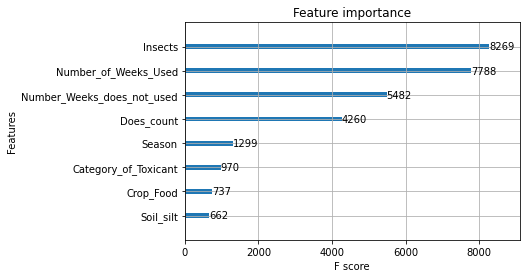

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

In [ ]:
#bagging

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
#bg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, n_jobs = -1, n_estimators = 100)

bg = BaggingClassifier(KNeighborsClassifier(n_neighbors=3, weights = 'distance')) #max_samples=0.5, max_features=0.5


bg.fit(X_train, y_train)
print("Score: ", bg.score(X_test, y_test))
y_train_pred = bg.predict(X_train)
pred = bg.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
#print("F1 score: ", f1_score(y_test, pred, average='micro'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))

Score:  0.79275
Training_acc 0.967453125
Testing acc 0.79275
col_0            0     1    2
Crop_status                  
0            12177  1028  161
1             1669   487   70
2              248   140   20
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     13366
           1       0.29      0.22      0.25      2226
           2       0.08      0.05      0.06       408

    accuracy                           0.79     16000
   macro avg       0.41      0.39      0.40     16000
weighted avg       0.76      0.79      0.78     16000



In [ ]:
#Boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=1000)

adb.fit(X_train, y_train)

print("Score", adb.score(X_test, y_test))

y_train_pred = adb.predict(X_train)
pred = adb.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
#print("F1 score: ", f1_score(y_test, pred, average='micro'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))


#col_0            0    1  2
#Crop_status                1500 missing data xgb
#0            11732  251  0
#1             1590  450  2
#2              221  143  0

#precision    recall  f1-score   support

 #     0.87      0.98      0.92     11983
  #    0.54      0.23      0.32      2042
   #   0.25      0.00      0.01       364

Score 0.7297240947946347
Training_acc 0.7973278198623949
Testing acc 0.7297240947946347
col_0           0     1    2
Crop_status                 
0            9844  2024  115
1            1301   634  107
2             210   132   22
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     11983
           1       0.23      0.31      0.26      2042
           2       0.09      0.06      0.07       364

    accuracy                           0.73     14389
   macro avg       0.39      0.40      0.39     14389
weighted avg       0.76      0.73      0.74     14389



In [ ]:
Training_acc 0.852171875
Testing acc 0.8453125
[[13095   270     1]
 [ 1799   427     0]
 [  274   131     3]] - 1500, max_depth = 3
 
Training_acc 0.847234375
Testing acc 0.84375
[[13150   216     0]
 [ 1876   350     0]
 [  290   118     0]] - 1500, max_depth = 2


---------------------------------
Training_acc 0.84409375
Testing acc 0.841125
[[13148   137     0]
 [ 2001   310     0]
 [  315    89     0]] #100 0.12999999999999998

Training_acc 0.844078125
Testing acc 0.8405625
[[13156   129     0]
 [ 2018   293     0]
 [  318    86     0]] 700 0.02

 Training_acc 0.852
Testing acc 0.8459375
[[13046   235     4]
 [ 1819   487     5]
 [  269   133     2]] 1460

In [ ]:
import xgboost as xgb

xgb1 = XGBClassifier()

dtrain = xgb.DMatrix(X_train, label=y_train, weight)
dtest = xgb.DMatrix(X_test, label=y_test)
predictors = ['Insects', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not_used', 'Season', 'Crop_Food', 'Soil_silt']

params = {
    # Parameters that we are going to tune.
    'n_estimators': 1500,
    'learning_rate': 0.05,
    'max_depth':2,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

params['eval_metric'] = "auc"

num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100,
)

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=100
)
print(cv_results)

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]


min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].max()
    boost_rounds = cv_results['test-mae-mean'].argmax()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Crop_status'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Crop_status'],eval_metric='auc')
        
    #Predict training set:
    
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain['Crop_status'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain['Crop_status'], dtrain_predprob))
                    

SyntaxError: ignored

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 3.1MB 7.3MB/s 
     |████████████████████████████████| 604kB 28.8MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 296kB 26.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=feb34812125cb61a38b208cebfa9278dbf6f9d4d016e076be6e0d1a723a16350
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=c63cf205265bc48f41bb951ff0d7b4ec5932fcc7fbde5fb93e5270ca2f0af39e
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
df.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,188,Feed,clay,1,0,0.0,0,1,0
1,209,Feed,clay,1,0,0.0,0,2,1
2,257,Feed,clay,1,0,0.0,0,2,1
3,257,Feed,silt,1,0,0.0,0,2,1
4,342,Feed,clay,1,0,0.0,0,2,1


In [ ]:
import pandas_profiling as pp 
profile = pp.ProfileReport(df)

profile.to_file("output_profile_ML.html") 

In [ ]:
profile

In [ ]:
pred
from google.colab import files

#data.to_excel(r'C:\Users\rallam\Desktop\ML_Hackathon\nan.xlsx', index = False)
pred.to_csv('pred_3.csv') 
files.download('pred_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
temp = {"Y1": ['a', 'b', 'c', 'b', 'e','e', 'e'],
        "Y2": ['c', 'b', 'd', 'b', 'e','e', 'e']}

temp1_df = pd.DataFrame(temp)
temp1_df.head(6)

temp1_df.drop_duplicates()

,Y1,Y2
0,a,c
1,b,b
2,c,d
4,e,e


In [ ]:
print(cross_val_score(model,training_data, y,cv=5))

Streaming output truncated to the last 5000 lines.
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_p

In [ ]:
print(cross_val_score(RandomForestClassifier(n_estimators=1000, bootstrap = True, criterion = "gini", max_features="auto", max_depth = None, n_jobs = -1, min_samples_leaf = 10),training_data, y1,cv=5))

[1. 1. 1. 1. 1.]


In [ ]:
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

test_df_off.drop('ID', axis = 1, inplace = True)

test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)


test_df_off.head()

#training_data=pd.get_dummies(X, columns=["Crop","Soil"])



,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not_used,Season
0,188,Feed,silt,1,0,NaN,0,2
1,410,Feed,silt,1,0,0.0,0,2
2,626,Feed,clay,1,0,0.0,0,2
3,731,Feed,clay,1,0,0.0,0,2
4,789,Food,clay,1,0,0.0,0,1


In [ ]:
test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil"])

test_df_off.drop('Soil_clay', axis = 1, inplace = True)

test_df_off.head()

,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not_used,Season,Crop_Feed,Crop_Food,Soil_silt
0,188,1,0,NaN,0,2,1,0,1
1,410,1,0,0.0,0,2,1,0,1
2,626,1,0,0.0,0,2,1,0,0
3,731,1,0,0.0,0,2,1,0,0
4,789,1,0,0.0,0,1,0,1,0


In [ ]:
# missing val training

miss_test_df_off = test_df_off[["Insects", "Category_of_Toxicant", "Does_count", "Number_Weeks_does_not_used", "Season", "Crop_Feed", "Crop_Food","Soil_silt", "Number_of_Weeks_Used"]]

miss_test_df_off_nonull = miss_test_df_off.dropna()

train_data_X = miss_test_df_off_nonull[["Insects", "Category_of_Toxicant", "Does_count", "Number_Weeks_does_not_used", "Season", "Crop_Feed", "Crop_Food","Soil_silt"]]
train_data_y = miss_test_df_off_nonull["Number_of_Weeks_Used"]

In [ ]:
print(train_data_X.columns)
print(train_data_X.shape)


Index(['Insects', 'Category_of_Toxicant', 'Does_count',
       'Number_Weeks_does_not_used', 'Season', 'Crop_Feed', 'Crop_Food',
       'Soil_silt'],
      dtype='object')
(31458, 8)


In [ ]:
print(train_data_y.head())
print(train_data_y.shape)

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Number_of_Weeks_Used, dtype: float64
(31458,)


In [ ]:
rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators = 100, bootstrap = True, criterion = "gini", max_features="sqrt")

rand_frst_clf.fit(train_data_X, train_data_y)

test_data = miss_test_df_off[["Insects", "Category_of_Toxicant", "Does_count", "Number_Weeks_does_not_used", "Season", "Crop_Feed", "Crop_Food","Soil_silt"]]

missing_val = test_df_off.copy()
missing_val['Number_of_Weeks_Used'] = pd.DataFrame(rand_frst_clf.predict(test_data))
miss_test_df_off.Number_of_Weeks_Used.fillna(missing_val.Number_of_Weeks_Used, inplace=True)
miss_test_df_off.head(25)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Insects,Category_of_Toxicant,Does_count,Number_Weeks_does_not_used,Season,Crop_Feed,Crop_Food,Soil_silt,Number_of_Weeks_Used
0,188,1,0,0,2,1,0,1,0.0
1,410,1,0,0,2,1,0,1,0.0
2,626,1,0,0,2,1,0,0,0.0
3,731,1,0,0,2,1,0,0,0.0
4,789,1,0,0,1,0,1,0,0.0
5,851,1,0,0,2,0,1,1,0.0
6,851,1,0,0,3,1,0,0,0.0
7,1056,1,0,0,1,1,0,0,0.0
8,1576,1,0,0,2,1,0,0,0.0
9,1576,1,0,0,1,1,0,0,0.0


In [ ]:
#test_df_off['Number_of_Weeks_Used'] = miss_test_df_off['Number_of_Weeks_Used']
test_df_off.fillna(test_df_off['Number_of_Weeks_Used'].median(), inplace = True)
test_df_off.isnull().sum()

Insects                       0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not_used    0
Season                        0
Crop_Feed                     0
Crop_Food                     0
Soil_silt                     0
dtype: int64

In [ ]:

from google.colab import files
test_df_off.head(50)
#data.to_excel(r'C:\Users\rallam\Desktop\ML_Hackathon\nan.xlsx', index = False)
test_df_off.to_csv('test_pred.csv') 
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
training_data.drop('Crop_status', axis = 1, inplace = True)

KeyError: ignored

In [ ]:
#print(training_data.shape, training_data.columns)

#print(y1.shape, y1.head(15))
print(test_df_off.shape, test_df_off.head(5))

(35000, 9)    Insects  Category_of_Toxicant  Does_count  ...  Crop_Feed  Crop_Food  Soil_silt
0      188                     1           0  ...          1          0          1
1      410                     1           0  ...          1          0          1
2      626                     1           0  ...          1          0          0
3      731                     1           0  ...          1          0          0
4      789                     1           0  ...          0          1          0

[5 rows x 9 columns]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
training_data.head()
test_df_off.head()

,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not_used,Season,Crop_Feed,Crop_Food,Soil_silt
0,188,1,0,28.0,0,2,1,0,1
1,410,1,0,0.0,0,2,1,0,1
2,626,1,0,0.0,0,2,1,0,0
3,731,1,0,0.0,0,2,1,0,0
4,789,1,0,0.0,0,1,0,1,0


In [ ]:
rand_forest_final = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=None, max_features="sqrt", min_samples_leaf=2, min_samples_split=10, n_estimators=1000)
rand_forest_final.fit(training_data, y)


pred = pd.DataFrame(rand_forest_final.predict(test_df_off))


In [ ]:
pred.shape
pred.to_csv('pred_2.csv') 
files.download('pred_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred.shape
pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
34995,0
34996,0
34997,0
34998,0
